# Práctica 6 - Clasificador de imágenes con perceptrón

Guarda una copia de este cuaderno en tu Google Drive para poder editarla y ejecutarla.

El propio cuaderno será tu informe del trabajo. Puedes añadir tantas secciones de código y de texto como consideres necesario para resolver todos los ejercicios propuestos y analizar los resultados obtenidos. Una vez hayas terminado, descarga el notebook en formato ipynb y súbelo a Moodle en la tarea habilitada para la práctica con el nombre NIP_P6_MLP.ipynb

Es **obligatorio** que se **guarden los resultados de la evaluación** de cada celda de código (para no tener que volver a ejecutarlas). Por defecto los notebooks estan configurados así (Edit→Notebook Settings → NUNCA actives: Omit code cell output when saving this notebook) 

Imports necesarios para ejecutar el trabajo

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import EarlyStopping
import time
import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras import regularizers

In [2]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    fig, axs = plt.subplots(1, 2,  figsize=(12, 6))
    for l in loss_list:
        axs[0].plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        axs[0].plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    axs[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')
    axs[0].grid()
    axs[0].legend()
    
    ## Accuracy
    for l in acc_list:
        axs[1].plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        axs[1].plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
    axs[1].grid()
    axs[1].legend()
    plt.show()

Carga del dataset MNIST

In [3]:
verbose = True

print('Loading MNIST dataset...')
# Problem dimensions
img_rows, img_cols = 28, 28
num_pixels = img_rows * img_cols
num_classes = 10
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, num_pixels)
x_test = x_test.reshape(10000, num_pixels)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.np_utils.to_categorical(y_test,  num_classes)

np.random.seed(0)
p = np.arange(x_train.shape[0])
np.random.shuffle(p)
x_train = x_train[p]
y_train = y_train[p]


Loading MNIST dataset...
60000 train samples
10000 test samples


Ejemplo de definición de la arquitectura de una red y de los parámetros de la optimización.

In [4]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Código para entrenar la red neuronal utilizando la función FIT

Observa como incluye un argumento para hacer separación de datos de validación



Epoch 1/20
422/422 [==============================] - 4s 7ms/step - loss: 0.6987 - accuracy: 0.8293 - val_loss: 0.4160 - val_accuracy: 0.8853
Epoch 2/20
422/422 [==============================] - 2s 6ms/step - loss: 0.3721 - accuracy: 0.9006 - val_loss: 0.3442 - val_accuracy: 0.9030
Epoch 3/20
422/422 [==============================] - 2s 5ms/step - loss: 0.3260 - accuracy: 0.9109 - val_loss: 0.3174 - val_accuracy: 0.9108
Epoch 4/20
422/422 [==============================] - 3s 6ms/step - loss: 0.3044 - accuracy: 0.9157 - val_loss: 0.3034 - val_accuracy: 0.9140
Epoch 5/20
422/422 [==============================] - 2s 6ms/step - loss: 0.2915 - accuracy: 0.9189 - val_loss: 0.2962 - val_accuracy: 0.9165
Epoch 6/20
422/422 [==============================] - 3s 6ms/step - loss: 0.2824 - accuracy: 0.9218 - val_loss: 0.2892 - val_accuracy: 0.9173
Epoch 7/20
422/422 [==============================] - 3s 6ms/step - loss: 0.2764 - accuracy: 0.9234 - val_loss: 0.2853 - val_accuracy: 0.9192
Epoch 

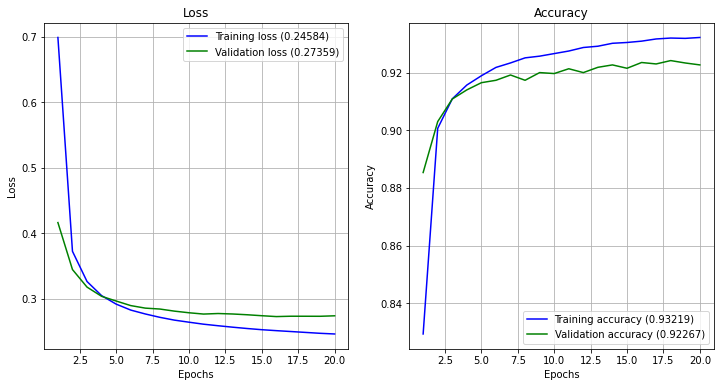

In [5]:
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

## Preguntas a responder de la celda anterior


### 1 - ¿Qué representan los parámetros batch_size y epochs? (Respuesta dos líneas max).

Batch size: Número de muestras procesadas antes de reajustar los pesos de la red

Epoch: Número de veces que procesa el conjunto de datos de entrenamiento completo

### 2 - Explica las dos gráficas que se muestran al finalizar el entrenamiento.

*Loss*: Divergencia media entre el conjunto de datos introducidos y los esperados respecto a una función de coste. En este caso, se utiliza la función *cross-entropy*.

*Accuracy*: Procentaje de clasificaciones correctas (verdaderos positivos y negativos respecto a todas las imágenes clasificadas).

Se presentan gráficas de ámbas a medida que aumenta el *epoch*, tanto para el conjunto de datos de entrenamiento como el de una sección de dichos datos usada para comprobar si se produce sobreajuste. Se puede observar que:

- El *loss* se reduce a medida que aumentan las veces que se ha procesado el conjunto de datos de entrenamiento, viceversa para el *accuracy*. (Nota: no estan relacionados)
- El *loss* es mayor utilizando la red sobre el conjunto de datos de validación, y tiene un *accuracy menor*.
- En ambas gráficas, la validación tiende a diverger antes que el entrenamiento.

Evaluación de la red

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #plt.tight_layout()


def plot_mnist_confusion_matrix(y_test, y_pred, normalize=False):
    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    y_tst = [np.argmax(y) for y in y_test]
    y_prd = [np.argmax(y) for y in y_pred]

    cnf_matrix = confusion_matrix(y_tst, y_prd)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          normalize=normalize)

Accuracy train:  93.28%
Accuracy test:   92.73%
313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization


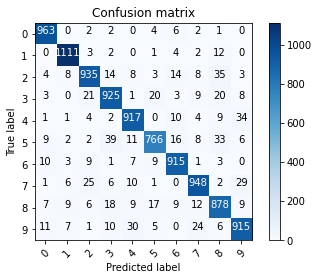

In [7]:
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')

## Preguntas a responder de la celda anterior

### 1 - Explica la gráfica que se muestra

Es una matriz de confusión. Las filas indican el número real de la imágen evaluada, mientras que las columnas indican la predicción realizada. El número en cada cuadrado indica el número de imágenes clasificadas de esta manera. Permite visualizar qué tipo de errores comete.

Se puede apreciar que la mayoría de las imágenes están correctamente clasificadas (en la diagonal). Pero se puede apreciar, por ejemplo, que 39 imágenes del número 2 las ha clasificado como el número 8.

## TRABAJO PRÁCTICO 


**Trabajo práctico**: incluye a continuación las secciones de código para probar las diferentes redes. 
No incluyas una sección para cada red que pruebes. El notebook que entregues deberá incluir:


1.   La mejor red obtenida para el caso de una capa
2.   La mejor red obtenida para el caso de dos capas
3.   La mejor red obtenida para el caso de tres capas
4.   Ejemplo de red en la que se produzca sobreajuste al entrenar
5.   Modificación de la red anterior utilizando técnicas para evitar el sobreajuste
6.   Incluye en una sección de texto una tabla en la que aparezca resumido el conjunto de pruebas realizado y los resultados obtenidos en cada caso (nº capas, nº neuronas, accuracy, técnicas de sobreajuste, etc.). Incluye en esta sección también las conclusiones obtenidas del trabajo.
7.   Recuerda mostrar y comentar algún ejemplo de imagen mal clasificada por la red que mejor se comporte.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Training time:  19.579s


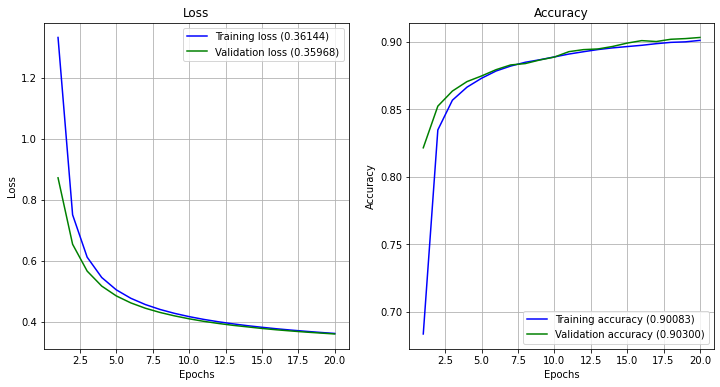

Accuracy train:  90.17%
Accuracy test:   90.64%
313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization


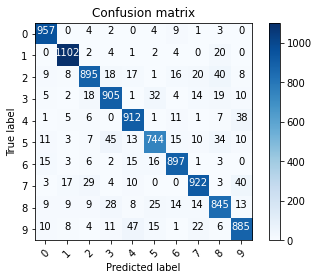

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Training time:  23.405s


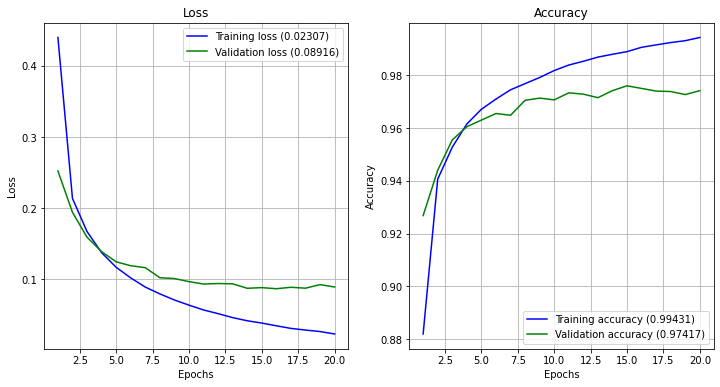

Accuracy train:  99.36%
Accuracy test:   97.30%
313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization


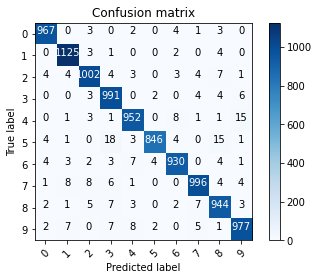

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Training time:  24.179s


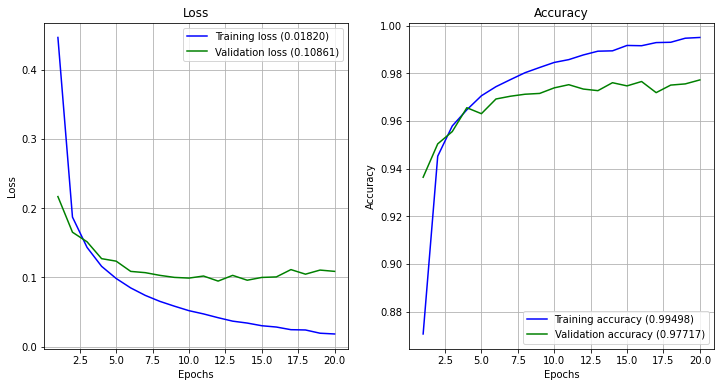

Accuracy train:  99.49%
Accuracy test:   97.22%
313/313 [==============================] - 1s 1ms/step
Confusion matrix, without normalization


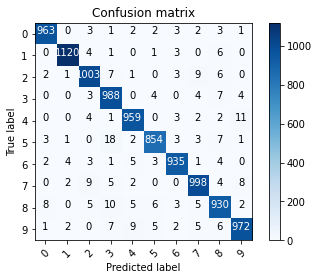

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________
Training time:  41.438s


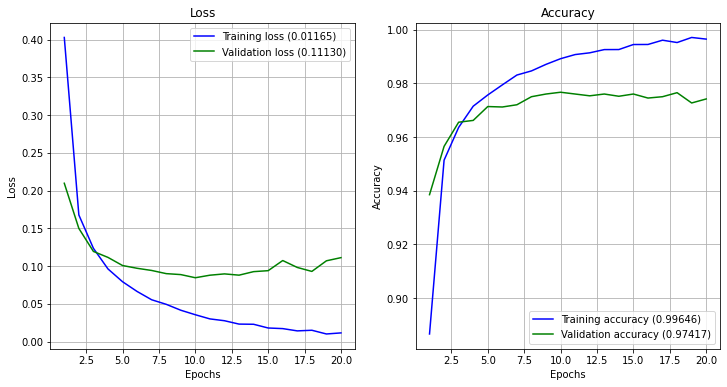

Accuracy train:  99.42%
Accuracy test:   97.41%
313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization


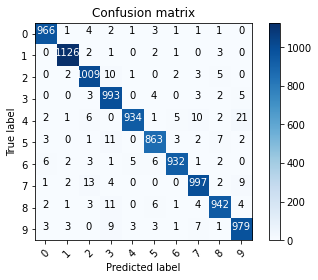

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 128)               8320      
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________
Epoch 15: early stopping
Training time:  18.168s


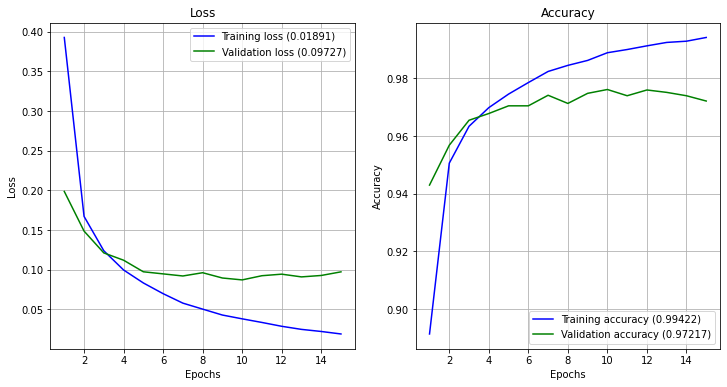

Accuracy train:  99.28%
Accuracy test:   97.49%
313/313 [==============================] - 1s 1ms/step
Confusion matrix, without normalization


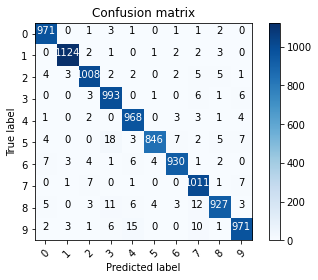

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________
Training time:  25.979s


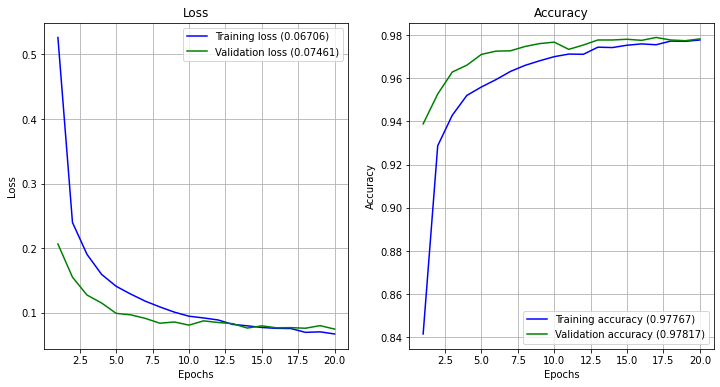

Accuracy train:  99.16%
Accuracy test:   97.70%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


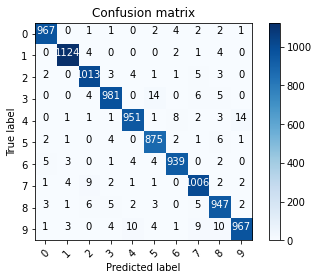

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                50240     
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 128)               8320      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 10)                650       
                                                                 
Total params: 71,626
Trainable params: 71,626
Non-trainable params: 0
_________________________________________________________________
Training time:  41.588s


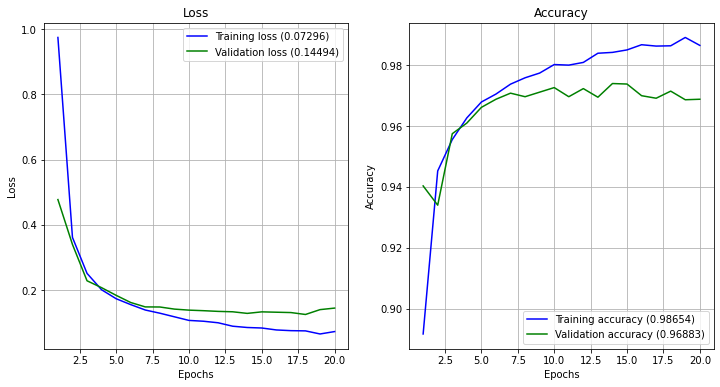

Accuracy train:  98.32%
Accuracy test:   96.60%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


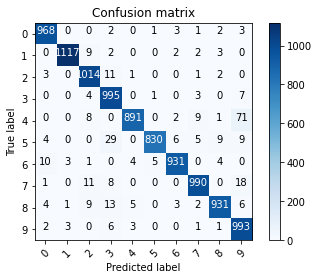

In [9]:
# Genera un modelo de red neuronal de una sola capa con los parámetros dados
def crearModeloUnaCapa(activation, optimizer):
    model = Sequential()
    model.add(Dense(units=num_classes, activation=activation, 
                    input_shape=(num_pixels,)))
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, metrics=["accuracy"])
    model.summary()
    return model

def crearModeloDosCapas(layerActivation, layerUnits, activation, optimizer):
    model = Sequential()
    model.add(Dense(units=layerUnits, activation=layerActivation, 
                    input_shape=(num_pixels,)))
    model.add(Dense(units=num_classes, activation=activation))
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, metrics=["accuracy"])
    model.summary()
    return model

def crearModeloTresCapas(layerActivation, layerUnits1, layerUnits2, activation,
                        optimizer):
    model = Sequential()
    model.add(Dense(units=layerUnits1, activation=layerActivation, 
                    input_shape=(num_pixels,)))
    model.add(Dense(units=layerUnits2, activation=layerActivation, 
                    input_shape=(num_pixels,)))
    model.add(Dense(units=num_classes, activation=activation))
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, metrics=["accuracy"])
    model.summary()
    return model

def crearModeloTresCapasDropout(layerActivation, layerUnits1, layerUnits2, activation,
                        optimizer):
    model = Sequential()
    model.add(Dense(units=layerUnits1, activation=layerActivation, 
                    input_shape=(num_pixels,)))
    model.add(Dropout(0.2))
    model.add(Dense(units=layerUnits2, activation=layerActivation, 
                    input_shape=(num_pixels,)))
    model.add(Dropout(0.2))
    model.add(Dense(units=num_classes, activation=activation))
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, metrics=["accuracy"])
    model.summary()
    return model

def crearModeloTresCapasRegularizer(layerActivation, layerUnits1, layerUnits2, activation,
                        optimizer):
    model = Sequential()
    model.add(Dense(units=layerUnits1, activation=layerActivation, 
                    input_shape=(num_pixels,)))
    model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(units=layerUnits2, activation=layerActivation, 
                    input_shape=(num_pixels,)))
    model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(units=num_classes, activation=activation))
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, metrics=["accuracy"])
    model.summary()
    return model

# Entrena el modelo dado con los parámetros dados. Devuelve su historia
def entrenarModelo(model):
    t0 = time.perf_counter()
    history = model.fit(x_train, y_train, 
                                       batch_size=128, epochs=20, 
                                       validation_split=0.1, 
                                       verbose=0)
    train_time = time.perf_counter() - t0
    print('%s %.3f%s' %  ('Training time: ', train_time, 's'))
    return history

# Entrena el modelo dado con los parámetros dados. Devuelve su historia
def entrenarModeloEarlystop(model):
    earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
    t0 = time.perf_counter()
    history = model.fit(x_train, y_train, 
                                       batch_size=128, epochs=20, 
                                       validation_split=0.1,
                                       callbacks=[earlystop],
                                       verbose=0)
    train_time = time.perf_counter() - t0
    print('%s %.3f%s' %  ('Training time: ', train_time, 's'))
    return history

# Genera las gráficas de loss, accuracy y matriz de confusión de un modelo dado
def evaluarModelo(model, history):
    plot_history(history)
    train_score = model.evaluate(x_train, y_train, verbose=0)
    test_score = model.evaluate(x_test, y_test, verbose=0)
    print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
    print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))
    y_pred = model.predict(x_test)
    plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)

# Mejor red de una capa (sólo perceptrón)
modeloUnaCapa = crearModeloUnaCapa(activation="softmax", optimizer=SGD())
historyUnaCapa = entrenarModelo(modeloUnaCapa)
evaluarModelo(modeloUnaCapa, historyUnaCapa)

# Mejor red de dos capas
modeloDosCapas = crearModeloDosCapas(layerActivation="relu", layerUnits = 64,
                                    activation="softmax", 
                                    optimizer=Adam())
historyDosCapas = entrenarModelo(modeloDosCapas)
evaluarModelo(modeloDosCapas, historyDosCapas)

# Mejor red de tres capas
modeloTresCapas = crearModeloTresCapas(layerActivation="relu", 
                                        layerUnits1 = 64, layerUnits2 = 32, 
                                        activation="softmax", 
                                        optimizer=Adam())
historyTresCapas = entrenarModelo(modeloTresCapas)
evaluarModelo(modeloTresCapas, historyTresCapas)

# Red con sobreajuste
modeloTresCapasSobreajuste = crearModeloTresCapas(layerActivation="relu", 
                                        layerUnits1 = 64, layerUnits2 = 128, 
                                        activation="softmax", 
                                        optimizer=Adam())
historyTresCapasSobreajuste = entrenarModelo(modeloTresCapasSobreajuste)
evaluarModelo(modeloTresCapasSobreajuste, historyTresCapasSobreajuste)

# Red con técnicas contra sobreajuste utilizadas

# Earlystop
modeloTresCapasEarlystopping = crearModeloTresCapas(layerActivation="relu", 
                                        layerUnits1 = 64, layerUnits2 = 128, 
                                        activation="softmax", 
                                        optimizer=Adam())
historyTresCapasEarlystopping = entrenarModeloEarlystop(modeloTresCapasEarlystopping)
evaluarModelo(modeloTresCapasEarlystopping, historyTresCapasEarlystopping)

# Dropout
modeloTresCapasDropout = crearModeloTresCapasDropout(layerActivation="relu", 
                                        layerUnits1 = 64, layerUnits2 = 128, 
                                        activation="softmax", 
                                        optimizer=Adam())
historyTresCapasDropout = entrenarModelo(modeloTresCapasDropout)
evaluarModelo(modeloTresCapasDropout, historyTresCapasDropout)

# Regularizer
modeloTresCapasRegularizer = crearModeloTresCapasRegularizer(layerActivation="relu", 
                                        layerUnits1 = 64, layerUnits2 = 128, 
                                        activation="softmax", 
                                        optimizer=Adam())
historyTresCapasRegularizer = entrenarModelo(modeloTresCapasRegularizer)
evaluarModelo(modeloTresCapasRegularizer, historyTresCapasRegularizer)


### Pruebas realizadas

---

#### Una capa

| Activación | Optimización | Accuracy(Train)  | Accuracy(Test)|
| ---        | ---          | ---              | ---           |
| sigmoid    | SGD          | 90.14%           | 90.71%        |
| ""         | RMSprop      | 93.31%           | 92.71%        |
| ""         | Adam         | 93.30%           | 92.69%        |
| softmax    | SGD          | 90.08%           | 90.76%        |
| ""         | RMSprop      | 93.29%           | 92.47%        |
| ""         | Adam         | 93.31%           | 92.66%        |

Los mejores optimizadores son RMSprop y Adam. No hay mucha diferencia entre sigmoidal y softmax, pero se prefiere el segundo pues normaliza la distribución.

--- 

### Dos capas

| Capa oculta | Capa salida | Optimización | Accuracy(Train) | Accuracy(Test) |
| --- | --- | --- | --- | --- |
| relu (2 nodos)   | softmax | Adam | 64.71% | 64.53% |
| relu (4 nodos)   | softmax | Adam | 87.17% | 86.64% |
| relu (8 nodos)   | softmax | Adam | 92.25% | 92.13% |
| relu (16 nodos)  | softmax | Adam | 95.86% | 95.07% |
| relu (32 nodos)  | softmax | Adam | 98.38% | 96.82% | 
| relu (64 nodos)  | softmax | Adam | 99.36% | 97.63% |
| relu (128 nodos) | softmax | Adam | 99.73% | 97.96% |
| relu (16 nodos)  | softmax | RMSprop | 96.03% | 95.27% |
| relu (32 nodos)  | softmax | RMSprop | 97.80% | 96.37% | 
| relu (64 nodos)  | softmax | RMSprop | 99.21% | 97.51% |
| relu (128 nodos) | softmax | RMSprop | 99.75% | 97.80% |
| sigmoid (16 nodos)  | softmax | Adam | 95.23% | 94.10% |
| sigmoid (32 nodos)  | softmax | Adam | 97.08% | 95.87% | 
| sigmoid (64 nodos)  | softmax | Adam | 98.40% | 97.00% |
| sigmoid (128 nodos  | softmax | Adam | 99.20% | 97.73% |
| sigmoid (16 nodos)  | softmax | RMSprop | 95.21% | 94.26% |
| sigmoid (32 nodos)  | softmax | RMSprop | 97.05% | 96.11% | 
| sigmoid (64 nodos)  | softmax | RMSprop | 98.21% | 97.11% |
| sigmoid (128 nodos) | softmax | RMSprop | 99.03% | 97.61% |

Se elige capa oculta ReLu de 64 nodos y optimización Adam como mejor compromiso entre precisión, tiempo de entrenamiento y no sufrir sobreajuste.

---

### Tres capas

Todas las pruebas se realizan con Relu-softmax-Adam

| Nodos capa 1 | Nodos capa 2 | Accuracy(Train) | Accuracy(Test) |
| --- | --- | --- | ---|
| 64  | 16  | 99.31% | 97.28% |
| 64  | 32  | 99.49% | 97.32% |
| 64  | 64  | 99.20% | 97.25% |
| 64  | 128 | 99.54% | 97.42% |
| 16  | 64  | 97.62% | 96.39% |
| 32  | 64  | 98.90% | 97.02% |
| 128 | 64  | 99.62% | 97.84% |

Se selecciona la configuración 64/32 por su mejor precisión sin sobreajuste. 
Las configuraciones 64/128 presentan sobreajuste significante

---
